<a href="https://www.kaggle.com/code/chandanarprasad/all-harry-potter-books-data?scriptVersionId=98558014" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud,STOPWORDS
import nltk
stopwords = nltk.corpus.stopwords.words('english')
import matplotlib.pyplot as plt

In [2]:
#Reading .txt data into a variable
def read_book(title_path):
    with open(title_path, "r", encoding ="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [3]:
#Calling 
book1 = read_book('../input/harry-potter-books-corpora-part-1-7/Book1.txt')
book2 = read_book('../input/harry-potter-books-corpora-part-1-7/Book2.txt')
book3 = read_book('../input/harry-potter-books-corpora-part-1-7/Book3.txt')
book4 = read_book('../input/harry-potter-books-corpora-part-1-7/Book4.txt')
book5 = read_book('../input/harry-potter-books-corpora-part-1-7/Book5.txt')
book6 = read_book('../input/harry-potter-books-corpora-part-1-7/Book6.txt')
book7 = read_book('../input/harry-potter-books-corpora-part-1-7/Book7.txt')

character_list = pd.read_csv('../input/harry-potter-books-corpora-part-1-7/characters_list.csv')

In [4]:
#Length of books
len(book1), len(book2), len(book3), len(book4), len(book5), len(book6), len(book7)

(459169, 514948, 655473, 1149706, 1559298, 1026630, 1188915)

In [5]:
#Most common term frequenices - top 20 for each book
book1_tf = Counter(book1.split()).most_common(20)
book2_tf = Counter(book2.split()).most_common(20)
book3_tf = Counter(book3.split()).most_common(20)
book4_tf = Counter(book4.split()).most_common(20)
book5_tf = Counter(book5.split()).most_common(20)
book6_tf = Counter(book6.split()).most_common(20)
book7_tf = Counter(book7.split()).most_common(20)

print(book1_tf)
print('\n')
print(book2_tf)
print('\n')
print(book3_tf)
print('\n')
print(book4_tf)
print('\n')
print(book5_tf)
print('\n')
print(book6_tf)
print('\n')
print(book7_tf)
print('\n')

[('the', 3654), ('and', 2139), ('to', 1827), ('a', 1578), ('Harry', 1254), ('of', 1233), ('was', 1150), ('he', 1020), ('in', 898), ('his', 892), ('—', 883), ('had', 689), ('said', 659), ('you', 581), ('at', 580), ('it', 550), ('on', 544), ('that', 523), ('as', 482), ('He', 469)]


[('the', 4151), ('and', 2361), ('to', 2004), ('of', 1979), ('a', 1711), ('Harry', 1445), ('was', 1243), ('his', 1115), ('said', 1056), ('—', 987), ('he', 979), ('in', 956), ('had', 668), ('at', 647), ('you', 591), ('it', 581), ('that', 567), ('as', 536), ('on', 519), ('I', 503)]


[('the', 5195), ('and', 2955), ('to', 2588), ('of', 2530), ('a', 2014), ('Harry', 1783), ('was', 1626), ('his', 1426), ('said', 1302), ('he', 1282), ('—', 1219), ('in', 1140), ('had', 897), ('at', 779), ('you', 753), ('it', 704), ('that', 684), ('I', 676), ('on', 645), ('with', 638)]


[('the', 9385), ('and', 5414), ('to', 4716), ('of', 4697), ('a', 3429), ('Harry', 2839), ('was', 2674), ('he', 2539), ('his', 2476), ('said', 2255), 

In [6]:
print(character_list.shape)
character_list.head()

(65, 3)


,id,name,bio
0,0,Regulus Arcturus Black,Brother of Sirius. Used to be a Death Eater bu...
1,1,Sirius Black,Best friend of James Potter and godfather of H...
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...
4,4,Vincent Crabbe Sr.,Father of Crabbe and death-eater who escaped A...


In [7]:
character_list.bio = character_list.bio.astype('string')
character_list.name = character_list.name.astype('string')
character_list.bio = character_list.bio.str.lower()
character_list.name = character_list.name.str.lower()
character_list.drop(columns=['id'],inplace=True)
character_list.head()

,name,bio
0,regulus arcturus black,brother of sirius. used to be a death eater bu...
1,sirius black,best friend of james potter and godfather of h...
2,lavender brown,killed by a werewolf. she was a gryffindor stu...
3,cho chang,ravenclaw student who dated cedric diggory and...
4,vincent crabbe sr.,father of crabbe and death-eater who escaped a...


In [8]:
#Character list where "father" is used in the bio for description
character_list[character_list['bio'].str.contains("father")]['name']

1             sirius black
4       vincent crabbe sr.
19               goyle sr.
27        frank longbottom
30    xenophilius lovegood
33           lucius malfoy
40            james potter
43          tom riddle sr.
50          arthur weasley
Name: name, dtype: string

In [9]:
#Character list where "mother" is used in the bio for description
character_list[character_list['bio'].str.contains("mother")]['name']

26    alice longbottom
34     narcissa malfoy
41         lily potter
44         mary riddle
56       molly weasley
Name: name, dtype: string

In [10]:
#Character list where "potter" is used in the bio for description
character_list[character_list['bio'].str.contains("potter")]['name']

1        sirius black
3           cho chang
31        remus lupin
38    peter pettigrew
55      ginny weasley
Name: name, dtype: string

In [11]:
#Character list where "ravenclaw" is used in the bio for description
character_list[character_list['bio'].str.contains("ravenclaw")]['name']

3         cho chang
29    luna lovegood
Name: name, dtype: string

In [12]:
#Character list where "weasley" is used in the bio for description
character_list[character_list['bio'].str.contains("weasley")]['name']

8          fleur delacour
21       hermione granger
25    bellatrix lestrange
50         arthur weasley
53           fred weasley
54         george weasley
56          molly weasley
Name: name, dtype: string

In [13]:
stopwords = ["Harry","Potter","Hermione","Ron","J","K","Rowling","S","t","said","Page","Professor","know","back"] +list(STOPWORDS)

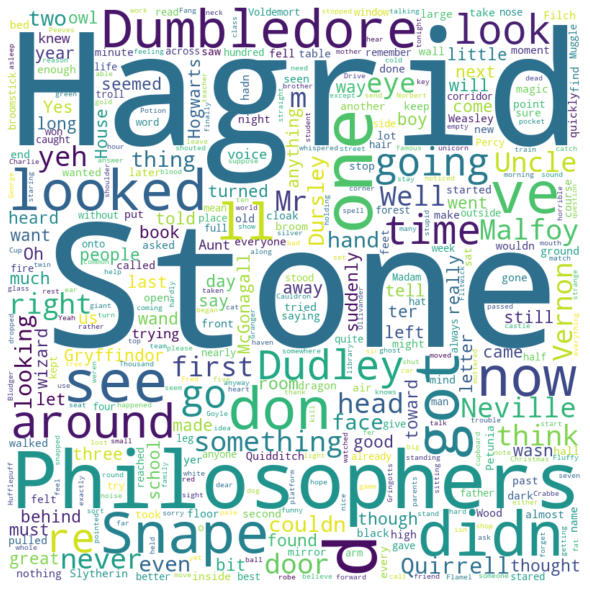

In [14]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'white',
                      stopwords = stopwords, 
                      min_font_size = 10,
                     max_words=1000,
                     collocations=False).generate(book1)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

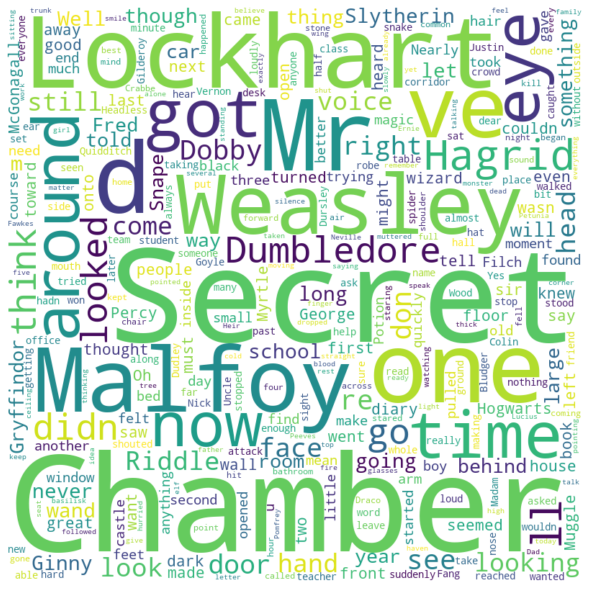

In [15]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'white',
                      stopwords = stopwords, 
                      min_font_size = 10,
                     max_words=1000,
                     collocations=False).generate(book2)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

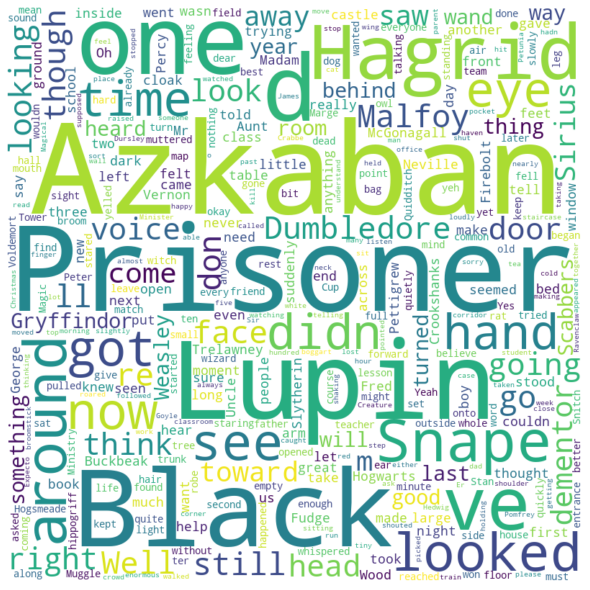

In [16]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'white',
                      stopwords = stopwords, 
                      min_font_size = 10,
                     max_words=1000,
                     collocations=False).generate(book3)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

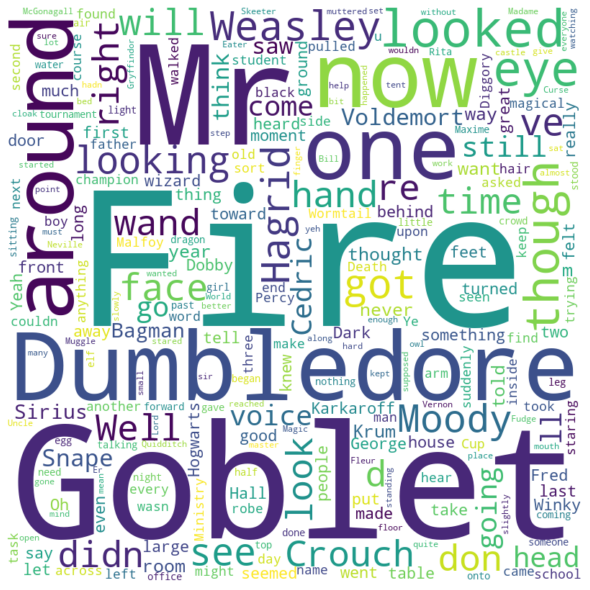

In [17]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'white',
                      stopwords = stopwords, 
                      min_font_size = 10,
                     max_words=1000,
                     collocations=False).generate(book4)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

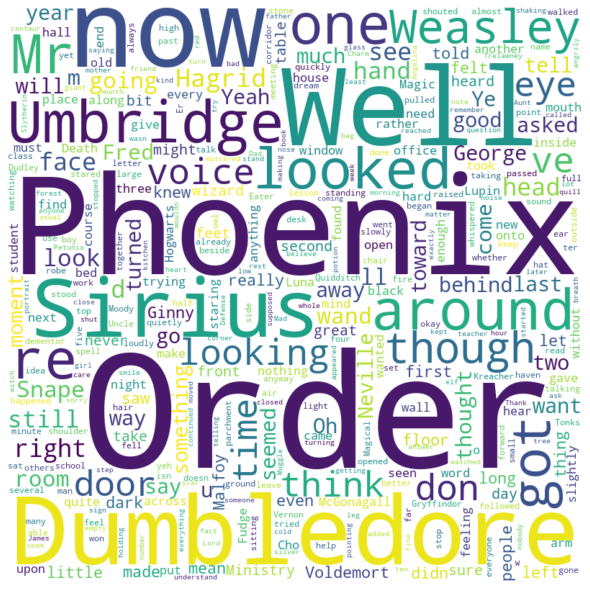

In [18]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'white',
                      stopwords = stopwords, 
                      min_font_size = 10,
                     max_words=1000,collocations=False).generate(book5)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

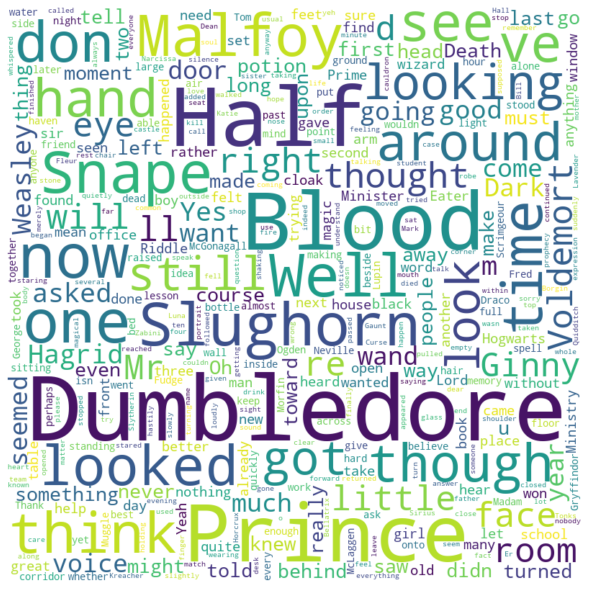

In [19]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'white',
                      stopwords = stopwords, 
                      min_font_size = 10,
                     max_words=1000,
                     collocations=False).generate(book6)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

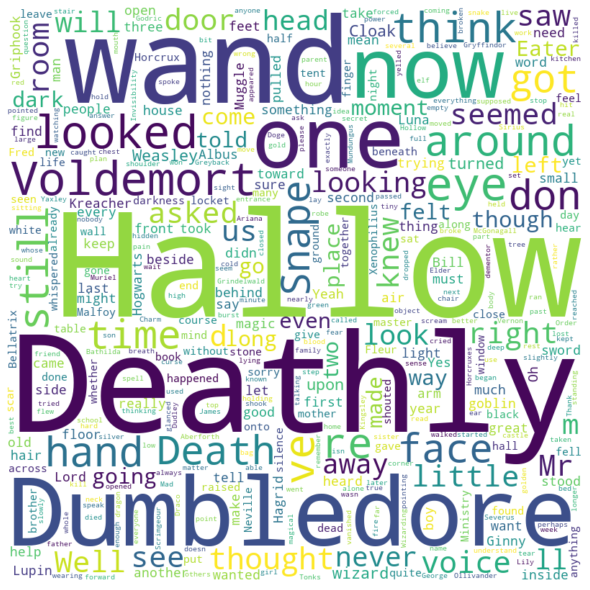

In [20]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'white',
                      stopwords = stopwords, 
                      min_font_size = 10,
                     max_words=1000,
                     collocations=False).generate(book7)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()